<a href="https://colab.research.google.com/github/RizkyaSalsabila/Assignment-Sem5_ML_Rizkya-Salsabila/blob/main/praktikum_uts/UTS_2341720056_Rizkya_Salsabila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Langkah 1 - Menghubungkan Google Drive ke Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Langkah 2 - Import Library beserta Instalasi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 38.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551810 sha256=6b41e9110fdeafa89cee5c2971db3eca2e9f0a16c73c7eec8ae6e03d2abfa1f0
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


# SOAL 1 : Penjelasan singkat dataset (jumlah sampel, fitur, tipe data).

## Upload atau load dataset

In [ ]:
# Load dataset CSV
df = pd.read_csv('/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/NEED/UCI_Credit_Card.csv')

# Lihat 5 baris pertama
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [ ]:
# a. Lihat jumlah sampel dan fitur
print("Jumlah sampel:", df.shape[0])
print("Jumlah fitur:", df.shape[1])

Jumlah sampel: 30000
Jumlah fitur: 25


Penjelasan:

Dataset memiliki 30.000 baris (sampel lagu) dan 25 kolom (fitur),
yang mencakup atribut numerik dan kategorikal yang akan digunakan
untuk clustering dan analisis lebih lanjut.


In [ ]:
# b. Lihat tipe data tiap kolom
print(df.dtypes)

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


Penjelasan:

Dataset ini memiliki kombinasi tipe data numerik (int64 dan float64) sebagai berikut:

=> Kolom ID, SEX, EDUCATION, MARRIAGE, AGE, PAY_0 sampai PAY_6, dan target 'default.payment.next.month' adalah integer (int64).

=> Kolom LIMIT_BAL, BILL_AMT1-6, PAY_AMT1-6 adalah float64, merepresentasikan jumlah uang atau saldo.

In [ ]:
# c. Statistik deskriptif (numerik)
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

Penjelasan :

Dataset memiliki 30.000 sampel dan 25 fitur numerik yang mencakup atribut demografis, histori pembayaran, saldo, dan target klasifikasi. Kolom ID berfungsi sebagai identifier unik, kolom LIMIT_BAL, BILL_AMT1-6, PAY_AMT1-6 merepresentasikan jumlah uang dengan beberapa outlier yang tinggi, sedangkan kolom SEX, EDUCATION, MARRIAGE, AGE, PAY_0-6 menunjukkan informasi demografis dan histori pembayaran. Target default.payment.next.month memiliki proporsi default sekitar 22%. Statistik deskriptif ini penting untuk memahami distribusi, rentang, dan skala fitur, serta menjadi dasar bagi langkah preprocessing seperti normalisasi dan clustering.

# SOAL 2 : Proses preprocessing (missing values, normalisasi, pembuatan fitur baru)

### a. Missing Value

In [ ]:
# Cek missing value
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


Penjelasan :

Setelah dilakukan pengecekan, tidak ditemukan missing value pada seluruh 25 kolom dataset. Hal ini menunjukkan bahwa semua data sudah lengkap, sehingga tidak diperlukan langkah imputasi atau penghapusan data akibat nilai yang hilang.

### b. Pembuatan fitur baru

In [ ]:
# Total tagihan dan pembayaran
df['TOTAL_BILL'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1)
df['TOTAL_PAY']  = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis=1)

# Rasio pembayaran terhadap tagihan (hindari div 0)
df['PAY_RATIO'] = df['TOTAL_PAY'] / df['TOTAL_BILL'].replace(0, np.nan)
df['PAY_RATIO'] = df['PAY_RATIO'].fillna(0)

# Rasio tagihan terhadap limit kredit
df['BILL_RATIO'] = df['TOTAL_BILL'] / df['LIMIT_BAL'].replace(0, np.nan)
df['BILL_RATIO'] = df['BILL_RATIO'].fillna(0)

# Rata-rata keterlambatan pembayaran
df['AVG_DELAY'] = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].apply(lambda x: x[x>0].mean(), axis=1)
df['AVG_DELAY'] = df['AVG_DELAY'].fillna(0)

# Jumlah bulan telat bayar
df['NUM_LATE_MONTHS'] = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].apply(lambda x: (x>0).sum(), axis=1)

# Rasio sisa tagihan yang belum dibayar
df['UNPAID_RATIO'] = (df['TOTAL_BILL'] - df['TOTAL_PAY']) / df['LIMIT_BAL'].replace(0, np.nan)
df['UNPAID_RATIO'] = df['UNPAID_RATIO'].fillna(0)

# Usia dalam kategori
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[20,30,40,50,60,100], labels=['20s','30s','40s','50s','60+'])

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,default.payment.next.month,TOTAL_BILL,TOTAL_PAY,PAY_RATIO,BILL_RATIO,AVG_DELAY,NUM_LATE_MONTHS,UNPAID_RATIO,AGE_GROUP
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,1,7704.0,689.0,0.089434,0.385200,2.0,2,0.350750,20s
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2000.0,1,17077.0,5000.0,0.292791,0.142308,2.0,2,0.100642,20s
2,3,90000.0,2,2,2,34,0,0,0,0,...,5000.0,0,101653.0,11018.0,0.108388,1.129478,0.0,0,1.007056,30s
3,4,50000.0,2,2,1,37,0,0,0,0,...,1000.0,0,231334.0,8388.0,0.036259,4.626680,0.0,0,4.458920,30s
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,679.0,0,109339.0,59049.0,0.540054,2.186780,0.0,0,1.005800,50s


Penjelasan :

Setelah menambahkan fitur-fitur baru, DataFrame memiliki 33 kolom, termasuk kolom asli dan fitur tambahan.

1. TOTAL_BILL dan TOTAL_PAY menunjukkan total tagihan dan total pembayaran nasabah selama 6 bulan terakhir. Misalnya, nasabah pertama memiliki total tagihan 7.704 dan total pembayaran 689.

2. PAY_RATIO memperlihatkan rasio pembayaran terhadap tagihan. Nilai mendekati 1 menandakan pembayaran hampir lunas, sedangkan nilai kecil atau 0 menandakan pembayaran minim atau tidak ada. Contoh, nasabah pertama memiliki rasio 0,089, menandakan sebagian kecil tagihan yang dibayar.

3. BILL_RATIO mengukur total tagihan terhadap limit kredit. Nilai >1 menandakan tagihan melebihi limit. Misalnya, nasabah ke-3 memiliki BILL_RATIO 1,129.

4. AVG_DELAY menunjukkan rata-rata keterlambatan pembayaran hanya untuk bulan yang terlambat (>0). Nasabah pertama memiliki rata-rata 2 bulan keterlambatan.

5. NUM_LATE_MONTHS menghitung jumlah bulan nasabah telat bayar. Nasabah pertama telat 2 bulan.

6. UNPAID_RATIO menunjukkan rasio sisa tagihan yang belum dibayar terhadap limit kredit. Nilai >1 berarti sisa tagihan melebihi limit. Misalnya, nasabah ke-3 memiliki rasio 1,007.

7. AGE_GROUP mengelompokkan usia nasabah menjadi kategori, memudahkan analisis segmentasi berdasarkan umur. Nasabah pertama berada di kategori 20s, sedangkan nasabah ke-4 di kategori 30s.

### c. Normalisasi

In [ ]:
# Pilih kolom numerik untuk standarisasi
numerical_cols = [
    'LIMIT_BAL', 'AGE',
    'TOTAL_BILL', 'TOTAL_PAY', 'PAY_RATIO',
    'BILL_RATIO', 'AVG_DELAY', 'NUM_LATE_MONTHS', 'UNPAID_RATIO'
]

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,default.payment.next.month,TOTAL_BILL,TOTAL_PAY,PAY_RATIO,BILL_RATIO,AVG_DELAY,NUM_LATE_MONTHS,UNPAID_RATIO,AGE_GROUP
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,...,0.0,1,-0.690692,-0.509027,-0.038002,-0.877698,1.480385,0.750059,-0.808317,20s
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,...,2000.0,1,-0.665997,-0.438153,-0.011491,-0.992741,1.480385,0.750059,-0.930539,20s
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,...,5000.0,0,-0.443170,-0.339216,-0.035531,-0.525178,-0.667275,-0.536713,-0.487594,30s
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,...,1000.0,0,-0.101507,-0.382454,-0.044934,1.131240,-0.667275,-0.536713,1.199258,30s
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,...,679.0,0,-0.422920,0.450421,0.020743,-0.024396,-0.667275,-0.536713,-0.488208,50s


Penjelasan :

Setelah standarisasi, semua fitur numerik memiliki mean = 0 dan standar deviasi = 1, sehingga skala setiap fitur sebanding. Nilai negatif menunjukkan di bawah rata-rata, nilai positif di atas rata-rata. Contohnya, LIMIT_BAL nasabah pertama bernilai -1,136, artinya lebih rendah dari rata-rata.

# SOAL 3 : Hasil clustering KMeans dan DBSCAN, lengkap dengan :
## o Nilai Silhouette dan Davies–Bouldin
## o Visualisasi 2D (PCA/TSNE opsional)

### a. Hasil Clustering K-Means

KMeans Silhouette: 0.297981296122969
KMeans Davies-Bouldin: 1.4390048393015162


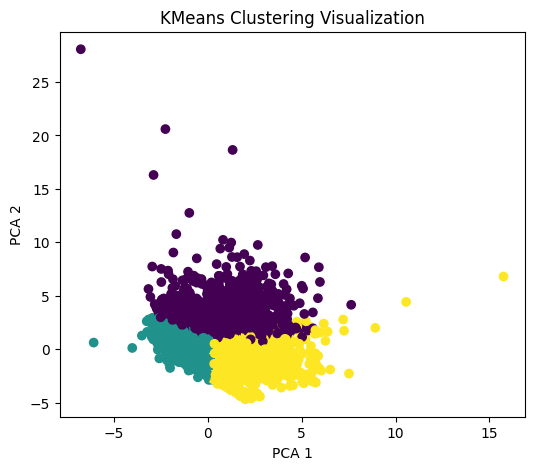

In [ ]:
# ----------------------------
# KMeans Clustering
# ----------------------------
X_scaled = df[numerical_cols].values
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Evaluasi KMeans
print("KMeans Silhouette:", silhouette_score(X_scaled, labels_kmeans))
print("KMeans Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_kmeans))

# Visualisasi Clustering (2D PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis')
plt.title("KMeans Clustering Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

Penjelasan :

Visualisasi menggunakan PCA 2D menunjukkan hasil clustering dengan KMeans. Setiap titik mewakili satu nasabah, dan warnanya menunjukkan cluster yang terbentuk. Cluster terlihat sebagian besar terpisah, meskipun ada beberapa titik yang tersebar di antar cluster, menunjukkan kemungkinan tumpang tindih. Nilai Silhouette Score = 0,298 menunjukkan pemisahan cluster sedang, sedangkan Davies-Bouldin Index = 1,439 menandakan cluster relatif rapat dan homogen.


### b. Hasil Clustering DBSCAN

DBSCAN Silhouette: 0.49626010443493085
DBSCAN Davies-Bouldin: 2.1373546829952517


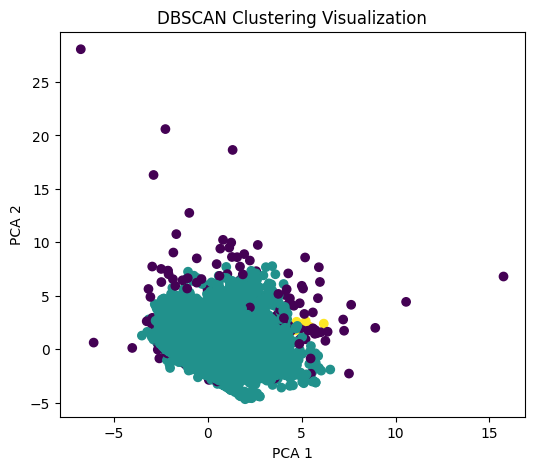

In [ ]:
# ----------------------------
# DBSCAN Clustering
# ----------------------------
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Evaluasi DBSCAN
if len(set(labels_dbscan)) > 1:
    print("DBSCAN Silhouette:", silhouette_score(X_scaled, labels_dbscan))
    print("DBSCAN Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_dbscan))
else:
    print("DBSCAN hanya menghasilkan 1 cluster → evaluasi tidak dapat dilakukan.")

# Visualisasi Clustering (2D PCA)
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='viridis')
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

Penjelasan :

Gambar tersebut menampilkan hasil clustering menggunakan DBSCAN setelah reduksi dimensi dengan PCA. Titik-titik berwarna menunjukkan cluster yang terbentuk, sedangkan titik terpisah merupakan noise. Nilai Silhouette (0,496) menandakan pemisahan cluster cukup baik, sementara Davies–Bouldin (2,137) menunjukkan masih ada sedikit tumpang tindih antar cluster.

# SOAL 4 : Implementasi Annoy :
## o Pemilihan 3–5 titik query secara acak
## o Output index dan tetangga terdekat dengan nilai jaraknya

In [ ]:
# ----------------------------
# Siapkan Annoy Index
# ----------------------------
dim = X_scaled.shape[1]  # jumlah fitur
ann = AnnoyIndex(dim, 'euclidean')

# Tambahkan semua data ke index
for i in range(X_scaled.shape[0]):
    ann.add_item(i, X_scaled[i])

# Build index (trees=10 atau lebih, semakin banyak semakin akurat)
ann.build(n_trees=10)

# ----------------------------
# Pilih 3–5 query point secara acak
# ----------------------------
np.random.seed(42)
query_indices = np.random.choice(X_scaled.shape[0], size=5, replace=False)

# ----------------------------
# Cari nearest neighbors
# ----------------------------
for query_idx in query_indices:
    neighbors, distances = ann.get_nns_by_item(query_idx, n=5, include_distances=True)
    print(f"\nQuery Point Index: {query_idx}")
    print("Nearest Neighbors and Distances:")
    for n, d in zip(neighbors, distances):
        print(f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster (KMeans): {labels_kmeans[n]}")


Query Point Index: 2308
Nearest Neighbors and Distances:
Neighbor Index: 2308 | Distance: 0.0000 | Cluster (KMeans): 1
Neighbor Index: 27700 | Distance: 0.0577 | Cluster (KMeans): 1
Neighbor Index: 154 | Distance: 0.1134 | Cluster (KMeans): 1
Neighbor Index: 27689 | Distance: 0.1174 | Cluster (KMeans): 1
Neighbor Index: 26624 | Distance: 0.1584 | Cluster (KMeans): 1

Query Point Index: 22404
Nearest Neighbors and Distances:
Neighbor Index: 22404 | Distance: 0.0000 | Cluster (KMeans): 0
Neighbor Index: 2878 | Distance: 0.0181 | Cluster (KMeans): 0
Neighbor Index: 5378 | Distance: 0.0434 | Cluster (KMeans): 0
Neighbor Index: 10719 | Distance: 0.1281 | Cluster (KMeans): 0
Neighbor Index: 11250 | Distance: 0.1381 | Cluster (KMeans): 0

Query Point Index: 23397
Nearest Neighbors and Distances:
Neighbor Index: 23397 | Distance: 0.0000 | Cluster (KMeans): 2
Neighbor Index: 19283 | Distance: 0.0540 | Cluster (KMeans): 2
Neighbor Index: 26902 | Distance: 0.0601 | Cluster (KMeans): 2
Neighbor I

Penjelasan :

Hasil di atas menunjukkan penerapan Annoy untuk menemukan tetangga terdekat (nearest neighbors) dari beberapa titik acak dalam dataset. Setiap query point memiliki lima tetangga dengan jarak Euclidean yang kecil, menunjukkan kemiripan tinggi antar data. Misalnya, titik dengan index 2308 dan tetangganya semuanya berada di cluster KMeans 1, menandakan konsistensi antar anggota cluster. Pola serupa juga terlihat pada titik lain seperti 22404 (cluster 0) dan 23397 (cluster 2), yang menunjukkan bahwa algoritma Annoy berhasil menemukan data yang memiliki karakteristik mirip di dalam cluster yang sama.